In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import re
import timeit

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in the data
df = pd.read_csv('movies.csv')

In [2]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# List data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
#since budget and gross do have NaN/Null values from above, we need to fill them first
#change data type of budget column from float64 to int64

df['budget'] = df['budget'].fillna(0) 
df['budget'] = df['budget'].astype('int64')

In [6]:
df['gross'] = df['gross'].fillna(0) 
df['gross'] = df['gross'].astype('int64')

In [7]:
df['released'] = df['released'].fillna('0') 

In [8]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [9]:
#creating an accurate year released column
#df['year_from_released']
#df['released'].str.split('[(,\s)]{1}').str[3]
df['year_from_released']=df['released'].str.extract(pat = '([0-9]{4})').astype('str')

#time it
#timeit.timeit(lambda: df['released'].str.split('[(,\s)]{1}').str[3], number=40)

In [145]:
#df

In [14]:
sort = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [11]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

In [12]:
# Need to test correlation points. Are there are any correlations with Budget/Company and Gross?

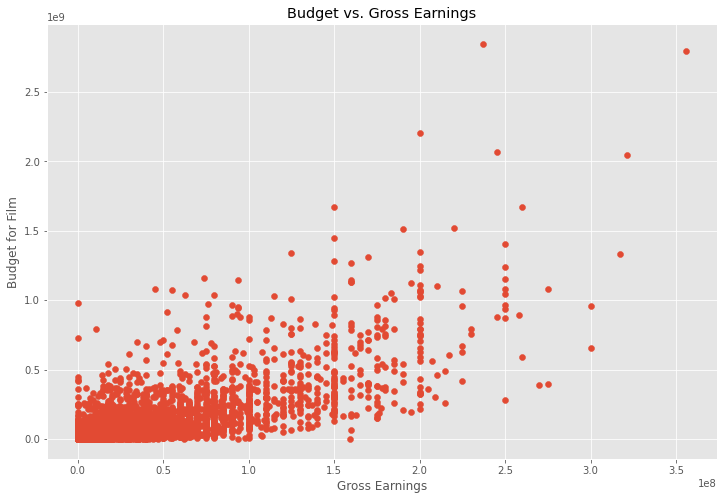

In [15]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs. Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

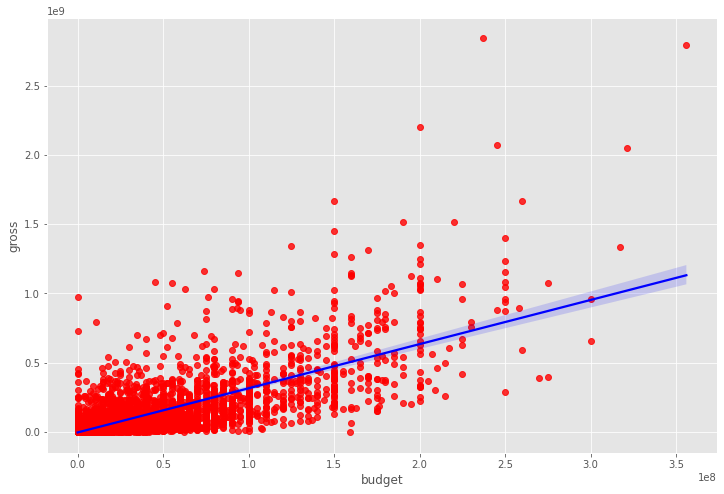

In [17]:
# Plot budget vs. gross using seaborn

sns.regplot(x='budget', y='gross', data=sort, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [21]:
sort.corr(method = 'pearson') #methods -> pearson(default), kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


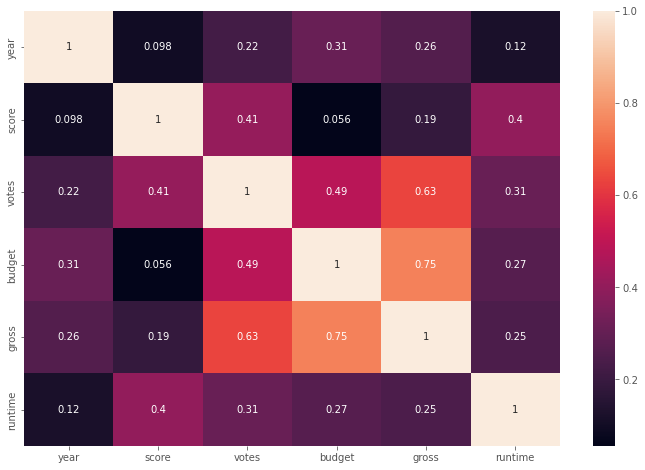

In [22]:
correlation_matrix = sort.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [23]:
df_numerized = sort

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_from_released
5445,533,5,0,2009,697,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,184,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,705,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,699,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,193,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,6,5,1989,1278,4.5,274.0,117,82,2797,55,0,0,1159,92.0,10
1614,1745,6,10,1989,56,5.2,1300.0,1033,1743,166,54,0,0,146,85.0,9
1606,2691,6,8,1989,258,6.0,2900.0,2743,946,1195,6,0,0,2237,89.0,9
1601,3836,-1,4,1989,1161,7.1,1500.0,1105,1696,681,18,0,0,504,104.0,10


In [25]:
#df

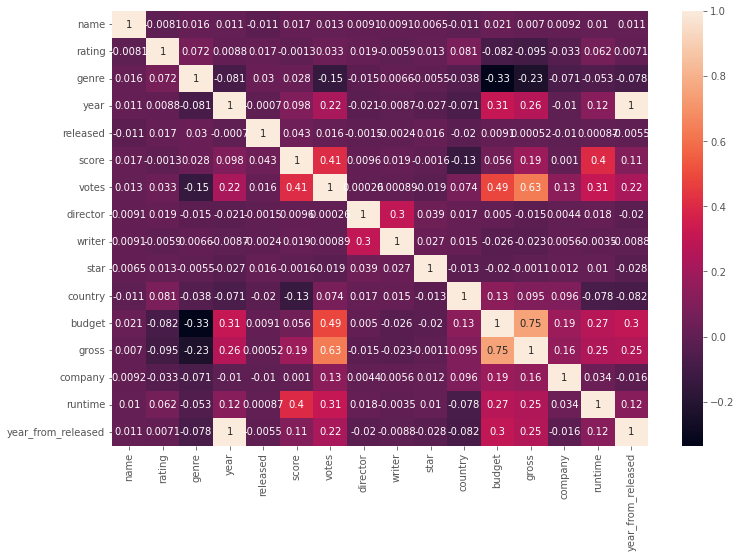

In [26]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [28]:
correlation_matrix.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

name                name                  1.000000
                    rating               -0.008069
                    genre                 0.016355
                    year                  0.011453
                    released             -0.011311
                                            ...   
year_from_released  budget                0.299603
                    gross                 0.254686
                    company              -0.016109
                    runtime               0.120636
                    year_from_released    1.000000
Length: 256, dtype: float64

In [29]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre               budget               -0.334021
budget              genre                -0.334021
gross               genre                -0.234297
genre               gross                -0.234297
votes               genre                -0.145307
                                            ...   
year                year                  1.000000
genre               genre                 1.000000
rating              rating                1.000000
runtime             runtime               1.000000
year_from_released  year_from_released    1.000000
Length: 256, dtype: float64

In [31]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross               votes                 0.632834
votes               gross                 0.632834
budget              gross                 0.750157
gross               budget                0.750157
year                year_from_released    0.997295
year_from_released  year                  0.997295
name                name                  1.000000
company             company               1.000000
gross               gross                 1.000000
budget              budget                1.000000
country             country               1.000000
star                star                  1.000000
writer              writer                1.000000
director            director              1.000000
votes               votes                 1.000000
score               score                 1.000000
released            released              1.000000
year                year                  1.000000
genre               genre                 1.000000
rating              rating     

In [ ]:
# Highest Correlations to Gross Earnings: 1. Budget 2. Votes